In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from tffm import TFFMClassifier , utils
utils.
#Finally

In [13]:
df_ad = pd.read_csv('../datadays2020/ad.csv')
df_train = pd.read_csv('../datadays2020/click_train.csv')
df_event = pd.read_csv('../datadays2020/event.csv')
df_page = pd.read_csv('../datadays2020/page.csv')
df_topic = pd.read_csv('../datadays2020/page_topic.csv')
df_test = pd.read_csv('../datadays2020/click_test.csv')
#df_upv = pd.read_csv('data/user_page_view.csv')

In [14]:
df = pd.merge(df_train , df_event , on='displayId' , how='left')
dft = pd.merge(df_test , df_event , on='displayId' , how='left')
t=min(df_event['timestamp'])
timetable = [(0,6), (6,12),(12,18),(18,24)]
def discretiseTime(t,timetable):
    t=t%24
    for i , e in enumerate(timetable):
        #print(t , e)
        if t>=e[0] and t<= e[1]:
            return i

df['timestamp'] = df['timestamp'].apply(lambda x : discretiseTime((x-t)/(1000*3600) , timetable)) 
dft['timestamp'] = dft['timestamp'].apply(lambda x : discretiseTime((x-t)/(1000*3600) , timetable))                                                 
df.head()

,displayId,adId,clicked,timestamp,pageId,widgetId,userId,device,OS,browser
0,1210227,7182,0,2,420857,9519,782749,0,0,1
1,1210227,7125,0,2,420857,9519,782749,0,0,1
2,1210227,7181,0,2,420857,9519,782749,0,0,1
3,1210227,535,0,2,420857,9519,782749,0,0,1
4,1210227,7174,1,2,420857,9519,782749,0,0,1


In [15]:
df = pd.merge(df , df_page , on='pageId' , how='left')
dft = pd.merge(dft , df_page , on='pageId' , how='left')
df_topic=df_topic.sort_values(['pageId' , 'confidence'] , ascending=False)
df_topic=df_topic.drop_duplicates(['pageId'])
df = pd.merge(df , df_topic , on='pageId' , how='left')
dft = pd.merge(dft , df_topic , on='pageId' , how='left')
df = pd.merge(df , df_ad , on='adId' , how='left')
dft = pd.merge(dft , df_ad , on='adId' , how='left')
df.head()

,displayId,adId,clicked,timestamp,pageId,widgetId,userId,device,OS,browser,website,publisher,topicId,confidence,campaignId,advertiserId
0,1210227,7182,0,2,420857,9519,782749,0,0,1,477,49,20.0,0.316218,3402,7579
1,1210227,7125,0,2,420857,9519,782749,0,0,1,477,49,20.0,0.316218,251,5971
2,1210227,7181,0,2,420857,9519,782749,0,0,1,477,49,20.0,0.316218,3402,7579
3,1210227,535,0,2,420857,9519,782749,0,0,1,477,49,20.0,0.316218,3186,1419
4,1210227,7174,1,2,420857,9519,782749,0,0,1,477,49,20.0,0.316218,471,5528


In [16]:
df['topicId'] = df['topicId'].fillna(0)
df['confidence'] = df['confidence'].fillna(0)
dft['topicId'] = dft['topicId'].fillna(0)
dft['confidence'] = dft['confidence'].fillna(0)

In [17]:
df['clicked'] = df['clicked'].astype(np.int8)
df['timestamp'] = df['timestamp'].astype(np.int8)
df['pageId'] = df['pageId'].astype(np.int32)
df['widgetId'] = df['widgetId'].astype(np.int16)
df['userId'] = df['userId'].astype(np.int32)
df['device'] = df['device'].astype(np.int8)
df['OS'] = df['OS'].astype(np.int8)
df['browser'] = df['browser'].astype(np.int8)
df['website'] = df['website'].astype(np.int32)
df['publisher'] = df['publisher'].astype(np.int16)
df['topicId']= df['topicId'].astype(np.int8)
df['confidence'] =df['confidence'].astype(np.float32)
df['campaignId'] = df['campaignId'].astype(np.int16)
df['advertiserId'] = df['advertiserId'].astype(np.int16)

#dft['clicked'] = dft['clicked'].astype(np.int8)
dft['timestamp'] = dft['timestamp'].astype(np.int8)
dft['pageId'] = dft['pageId'].astype(np.int32)
dft['widgetId'] = dft['widgetId'].astype(np.int16)
dft['userId'] = dft['userId'].astype(np.int32)
dft['device'] = dft['device'].astype(np.int8)
dft['OS'] = dft['OS'].astype(np.int8)
dft['browser'] = dft['browser'].astype(np.int8)
dft['website'] = dft['website'].astype(np.int32)
dft['publisher'] = dft['publisher'].astype(np.int16)
dft['topicId']= dft['topicId'].astype(np.int8)
dft['confidence'] =dft['confidence'].astype(np.float32)
dft['campaignId'] = dft['campaignId'].astype(np.int16)
dft['advertiserId'] = dft['advertiserId'].astype(np.int16)

In [18]:
df.to_csv('../temp/trainmerge.csv' , index=False)
dft.to_csv('../temp/testmerge.csv' , index=False)

In [58]:
features = ['userId','adId' , 'timestamp' , 'device' , 'browser' , 'OS' , 'topicId'   , 'campaignId' , 'advertiserId' , 'widgetId' , 'website' , 'publisher']

In [59]:
dftemp = df[features]
dfttemp = dft[features]
dftemp.head()

,userId,adId,timestamp,device,browser,OS,topicId,campaignId,advertiserId,widgetId,website,publisher
0,782749,7182,2,0,1,0,20,3402,7579,9519,477,49
1,782749,7125,2,0,1,0,20,251,5971,9519,477,49
2,782749,7181,2,0,1,0,20,3402,7579,9519,477,49
3,782749,535,2,0,1,0,20,3186,1419,9519,477,49
4,782749,7174,2,0,1,0,20,471,5528,9519,477,49


In [65]:
X_train , X_test , Y_train , Y_test = train_test_split(dftemp , df['clicked'] , test_size = 0.33 , random_state = 42)

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
transformer = ColumnTransformer(  
    transformers=[
        ("all",        # Just a name
         OneHotEncoder(dtype = np.int8), # The transformer class
         [0,1,2,3,4,5,7,8,9,10,11]           # The column(s) to be applied on.
         ),
    ], remainder='passthrough'
)

transformer.fit(dftemp.append(dfttemp))

c:\users\sajjad\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('all', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.int8'>, handle_unknown='error', n_values=None,
       sparse=True), [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11])])

In [66]:
n = int(0.75*len(df))
tplus = df[df['clicked']>0].sample(n=n//2 , replace=True)
tminus = df[df['clicked']==0].sample(n=n//2 , replace=True)
X_train = pd.concat([tplus[features] ,tminus[features]])
Y_train = pd.concat([tplus['clicked'] , tminus['clicked']])

In [67]:
data = transformer.transform(X_train)
data.shape

(2731682, 853352)

In [68]:
datatest = transformer.transform(X_test)
datatest.shape

(1201941, 853352)

In [38]:
from sklearn.linear_model import LogisticRegression 
#clf = LogisticRegression(solver='liblinear',class_weight='balanced' , C=0.8 , penalty='l1').fit(data,Y_train)
clf = LogisticRegression(class_weight='balanced' , C=0.8).fit(data,Y_train)

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [69]:
order = 3
model = TFFMClassifier(
    order=order, 
    rank=8, 
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
    n_epochs=50, 
    batch_size=512,
    init_std=0.001,
    reg=0.001,
    input_type='sparse',
    seed=42
)
model.fit(data, Y_train.values, show_progress=True)
predictions = model.predict(data)
print('[order={}] accuracy: {}'.format(order, accuracy_score(Y_train.values, predictions)))
predictions = model.predict(datatest)
print('[order={}] accuracy: {}'.format(order, accuracy_score(Y_test.values, predictions)))
#model.destroy()

  0%|          | 0/50 [00:00<?, ?epoch/s]

KeyboardInterrupt: 

In [43]:
predictions = model.predict(data)
print('[order={}] accuracy: {}'.format(order, accuracy_score(Y_train.values, predictions)))
predictions = model.predict(datatest)
print('[order={}] accuracy: {}'.format(order, accuracy_score(Y_test.values, predictions)))

[order=2] accuracy: 0.7776849842007324
[order=2] accuracy: 0.7766728982537412


In [50]:
Xtest = dft
datates = transformer.transform(dfttemp)

In [55]:
Xtest['rank'] = model.predict_proba(datates)[:,1]
diad={}
for i,r in Xtest.iterrows():
    if r['displayId'] in diad:
        diad[r['displayId']].append(i)
    else:
        diad[r['displayId']] = [i,]
for i in diad:
    diad[i] = sorted(diad[i] , key =lambda x: -1 * Xtest.iloc[x]['rank'] )
arr = np.zeros(len(Xtest))

for i,r in Xtest.iterrows():
    arr[i] = diad[r['displayId']].index(i) + 1
Xtest['ranked'] = arr
#dftest.to_csv('../submit/sub4.csv',header=None,index=False)
dfsub = Xtest[['displayId' , 'adId' ,'ranked']]
dfsub['ranked'] = Xtest['ranked'].apply(lambda x : int(x) )
dfsub.head()
dfsub.to_csv('Sub18.csv',header=None,index=False)

c:\users\sajjad\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [53]:
dfsub.head(20)

,displayId,adId,ranked
0,151650,7585,3
1,151650,6257,1
2,151650,6690,2
3,151938,7454,4
4,151938,7370,2
5,151938,123,5
6,151938,6690,1
7,151938,7715,6
8,151938,7379,3
9,171024,7374,2


In [ ]:
def convert_to_nparray(f):
    return np.array(list(map(float,f[1:len(f)-1].split(', '))) , dtype=np.float32)


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../temp/traintemp.csv')
df.head()

,adId,campaignId,advertiserId,"('adId', 'pageId')","('adId', 'userId')","('adId', 'widgetId')","('adId', 'topicId')","('adId', 'website')","('adId', 'timestamp')","('campaignId', 'pageId')",...,"('campaignId', 'widgetId')","('campaignId', 'topicId')","('campaignId', 'website')","('campaignId', 'timestamp')","('advertiserId', 'pageId')","('advertiserId', 'userId')","('advertiserId', 'widgetId')","('advertiserId', 'topicId')","('advertiserId', 'website')","('advertiserId', 'timestamp')"
0,0.221737,0.224727,0.224727,0.161404,0.0,0.155725,0.205333,0.163295,0.222713,0.164609,...,0.146102,0.208109,0.156483,0.228169,0.164609,0.0,0.146102,0.208109,0.156483,0.228169
1,0.260697,0.263397,0.260914,0.000000,0.0,0.290247,0.317712,0.290247,0.278244,0.500000,...,0.287041,0.275868,0.287041,0.279325,0.500000,0.5,0.286164,0.274779,0.286164,0.278596
2,0.306210,0.306210,0.271636,0.416667,0.0,0.310680,0.317073,0.301724,0.352941,0.416667,...,0.310680,0.317073,0.301724,0.352941,0.392857,0.0,0.239264,0.246032,0.251256,0.308281
3,0.176039,0.207664,0.203040,0.000000,0.0,0.129921,0.132420,0.129921,0.145193,0.183099,...,0.158456,0.163554,0.158456,0.184182,0.183099,0.5,0.157323,0.163579,0.157323,0.181746
4,0.256725,0.256725,0.227297,0.666667,0.6,0.358808,0.242415,0.306375,0.252050,0.666667,...,0.358808,0.242415,0.306375,0.252050,0.571429,0.6,0.296780,0.211984,0.237896,0.222372


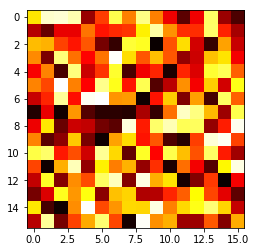

In [19]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [5]:
l = df.columns

In [6]:
l

Index(['adId', 'campaignId', 'advertiserId', '('adId', 'pageId')',
       '('adId', 'userId')', '('adId', 'widgetId')', '('adId', 'topicId')',
       '('adId', 'website')', '('adId', 'timestamp')',
       '('campaignId', 'pageId')', '('campaignId', 'userId')',
       '('campaignId', 'widgetId')', '('campaignId', 'topicId')',
       '('campaignId', 'website')', '('campaignId', 'timestamp')',
       '('advertiserId', 'pageId')', '('advertiserId', 'userId')',
       '('advertiserId', 'widgetId')', '('advertiserId', 'topicId')',
       '('advertiserId', 'website')', '('advertiserId', 'timestamp')'],
      dtype='object')

In [24]:
import numpy as np
a = np.zeros((3,6))

In [25]:
a

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [11]:
n = len(df)

In [12]:
np.sum(df[l[3]])/n

0.2229560210702746

In [16]:
l[20]

"('advertiserId', 'timestamp')"

In [26]:
i=0
for j in range(3,9):
    a[0][i] = np.sum(df[l[j]])/n
    i+=1
i=0
for j in range(9,15):
    a[1][i] = np.sum(df[l[j]])/n
    i+=1
i=0
for j in range(15,21):
    a[2][i] = np.sum(df[l[j]])/n    
    i+=1


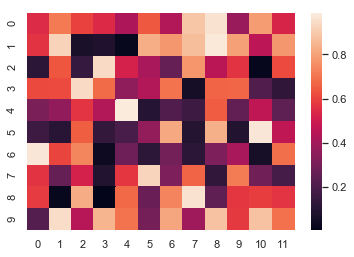

In [20]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

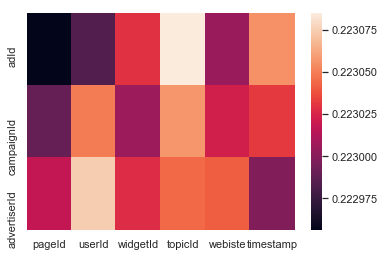

In [30]:
sns.heatmap(a ,yticklabels=['adId' , 'campaignId' , 'advertiserId'] , xticklabels=['pageId' , 'userId' , 'widgetId' , 'topicId'
                                                                                  ,'webiste','timestamp'])